In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [2]:
#Reading all of  dataset collectively as whole using 'glob'
fileList = glob.glob("Dataset/*.csv")                              #Creating the list of filenames.
dataframes = [pd.read_csv(f) for f in fileList]                    #generating list of dataframes.
dataset = pd.concat(dataframes)                                    #concatenating all dataframes into one. 
#dataset.to_excel(r'AirPollutionDataset.xlsx')
dataset.sort_values(by = 'Sampling Date')
dataset = dataset.reset_index(drop=True)                           #making the indexing proper. 
dataset.head()

,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Type of Location,SO2,NO2,RSPM/PM10,SPM
0,1/2/2008,Delhi,Delhi,Mayapuri Indl. Area,Industrial Areas,25.4,96.9,374.0,663.0
1,1/3/2008,Delhi,Delhi,Mayapuri Indl. Area,Industrial Areas,20.3,115.4,406.0,673.0
2,1/8/2008,Delhi,Delhi,Mayapuri Indl. Area,Industrial Areas,32.4,115.0,323.0,607.0
3,1/9/2008,Delhi,Delhi,Mayapuri Indl. Area,Industrial Areas,16.2,114.4,267.0,469.0
4,15/1/2008,Delhi,Delhi,Mayapuri Indl. Area,Industrial Areas,28.2,80.3,267.0,484.0


In [3]:
dataset.shape

(3305, 9)

In [4]:
#Removing the irrelevent attributes.
dataset = dataset.drop(['State','City/Town/Village/Area','Type of Location'],axis = 1)
#correcting the format of date.
dataset['Sampling Date'] = pd.to_datetime(dataset['Sampling Date'])
dataset = dataset.sort_values(by = 'Sampling Date')
dataset = dataset.reset_index(drop=True)  
dataset.head()

,Sampling Date,Location of Monitoring Station,SO2,NO2,RSPM/PM10,SPM
0,2005-01-03,Ashok Vihar,8.0,42.0,90.0,218.0
1,2005-01-04,Nizamuddin,11.0,44.0,150.0,554.0
2,2005-01-04,Shahzada Bagh,8.0,37.0,126.0,267.0
3,2005-01-04,Mayapuri Indl. Area,10.9,62.9,203.0,384.0
4,2005-01-05,Town Hall,3.7,104.4,191.0,428.0


In [5]:
dataset.isnull().sum()                           #showing the number null values of each attribute. 

Sampling Date                       0
Location of Monitoring Station      0
SO2                               223
NO2                                29
RSPM/PM10                         214
SPM                               107
dtype: int64

In [6]:
#creating the groups of dataset according to the specific locations of Delhi.
grouped = dataset.groupby('Location of Monitoring Station')
for name,group in grouped:
    print(name)
    print(group.head())

Ashok Vihar
   Sampling Date Location of Monitoring Station  SO2   NO2  RSPM/PM10    SPM
0     2005-01-03                    Ashok Vihar  8.0  42.0       90.0  218.0
8     2005-01-06                    Ashok Vihar  9.0  54.0       99.0  213.0
19    2005-01-11                    Ashok Vihar  8.0  47.0       90.0  287.0
28    2005-01-14                    Ashok Vihar  8.0  47.0       62.0  223.0
46    2005-01-25                    Ashok Vihar  6.0  32.0       96.0  233.0
BSZ Marg
    Sampling Date Location of Monitoring Station  SO2   NO2  RSPM/PM10    SPM
371    2005-07-01                       BSZ Marg  8.0  74.0      126.0  346.0
374    2005-07-02                       BSZ Marg  8.0  77.0      212.0  344.0
376    2005-07-03                       BSZ Marg  6.0  48.0      243.0  371.0
381    2005-07-04                       BSZ Marg  8.0  62.0      204.0  302.0
386    2005-07-05                       BSZ Marg  5.0  45.0      118.0  225.0
DCE
    Sampling Date Location of Monitoring Stat

In [7]:
loc = dataset['Location of Monitoring Station']
Ashok = loc.str.contains('Ashok Vihar')
janak = loc.str.contains('Janakpuri')
Maya = loc.str.contains('Mayapuri')
NYS = loc.str.contains('N.Y.')
Niza = loc.str.contains('Nizamuddin')
Prit = loc.str.contains('Pritampura')
Shahdara = loc.str.contains('Shahdara|Shahadra',regex = True)
Shahzada = loc.str.contains('Shahzada')
Siri = loc.str.contains('Siri')
Town = loc.str.contains('Town Hall')

dataset['Location of Monitoring Station'] = np.where(Ashok,'Ashok Vihar',
                                                     np.where(janak,'Janakpuri',
                                                             np.where(Maya,'Mayapuri Industrial Area',
                                                                     np.where(NYS,'N.Y. SCHOOL',
                                                                             np.where(Niza,'Nizamuddin',
                                                                                     np.where(Prit,'Pritampura',
                                                                                             np.where(Shahdara,'Shahdara',
                                                                                                     np.where(Shahzada,'Shahzada Bagh',
                                                                                                             np.where(Siri,'Siri Fort',
                                                                                                                     np.where(Town,'Town Hall',loc))))))))))

In [8]:
grouped = dataset.groupby('Location of Monitoring Station')
for name,group in grouped:
    print(name)
    print(group.head())

Ashok Vihar
   Sampling Date Location of Monitoring Station  SO2   NO2  RSPM/PM10    SPM
0     2005-01-03                    Ashok Vihar  8.0  42.0       90.0  218.0
8     2005-01-06                    Ashok Vihar  9.0  54.0       99.0  213.0
19    2005-01-11                    Ashok Vihar  8.0  47.0       90.0  287.0
28    2005-01-14                    Ashok Vihar  8.0  47.0       62.0  223.0
46    2005-01-25                    Ashok Vihar  6.0  32.0       96.0  233.0
BSZ Marg
    Sampling Date Location of Monitoring Station  SO2   NO2  RSPM/PM10    SPM
371    2005-07-01                       BSZ Marg  8.0  74.0      126.0  346.0
374    2005-07-02                       BSZ Marg  8.0  77.0      212.0  344.0
376    2005-07-03                       BSZ Marg  6.0  48.0      243.0  371.0
381    2005-07-04                       BSZ Marg  8.0  62.0      204.0  302.0
386    2005-07-05                       BSZ Marg  5.0  45.0      118.0  225.0
DCE
    Sampling Date Location of Monitoring Stat

In [9]:
# describe() is used to find count, mean, standard deviation, all Q values.
grouped.describe()

NO2                                      \
                                count       mean        std   min     25%   
Location of Monitoring Station                                              
Ashok Vihar                      69.0  49.157971  11.652359  22.0  41.000   
BSZ Marg                         69.0  69.579710  10.890371  45.0  61.000   
DCE                              25.0  22.564000   6.832696  13.0  16.800   
Janakpuri                       358.0  50.337430   9.318001  18.2  44.225   
Mayapuri Industrial Area        383.0  60.432637  27.175911  16.6  38.200   
N.Y. SCHOOL                     334.0  58.771257  24.956129  16.3  37.400   
Nizamuddin                      346.0  43.995954  12.223922  18.2  35.325   
Pritampura                      255.0  33.989412  10.132714  13.3  28.400   
Shahdara                        364.0  45.568956  15.242269  18.0  35.000   
Shahzada Bagh                   339.0  44.048968  15.133806  11.5  34.400   
Siri Fort                       356.0  42.602528  12.084140  15.5  33.000   
Town Hall                       378.0  69.361111  30.939992   6.3  44.050   

                                                     RSPM/PM10              \
                                  50%     75%    max     count        mean   
Location of Monitoring Station                                               
Ashok Vihar                     48.20  57.000   75.0      60.0  105.716667   
BSZ Marg                        69.00  77.000   93.0      69.0  144.478261   
DCE                             22.30  28.200   36.0       0.0         NaN   
Janakpuri                       51.00  56.450   76.7     337.0  194.139466   
Mayapuri Industrial Area        56.00  78.300  142.1     382.0  257.806283   
N.Y. SCHOOL                     56.20  77.950  147.5     332.0  168.852410   
Nizamuddin                      45.20  52.000  104.2     298.0  162.936242   
Pritampura                      33.00  38.200   87.8     247.0  164.777328   
Shahdara                        41.80  54.725  110.0     321.0  174.352025   
Shahzada Bagh                   39.80  51.000  114.7     334.0  170.988024   
Siri Fort                       43.00  52.225   77.7     334.0  182.380240   
Town Hall                       65.35  88.575  159.2     377.0  244.596817   

                                 ...       SO2          SPM              \
                                 ...       75%   max  count        mean   
Location of Monitoring Station   ...                                      
Ashok Vihar                      ...     9.000  11.0   67.0  302.477612   
BSZ Marg                         ...     8.000  15.0   69.0  377.884058   
DCE                              ...    11.800  17.5    0.0         NaN   
Janakpuri                        ...     9.000  15.8  343.0  389.638484   
Mayapuri Industrial Area         ...    18.700  34.9  380.0  530.802632   
N.Y. SCHOOL                      ...     9.000  18.7  333.0  360.510511   
Nizamuddin                       ...     8.725  17.7  344.0  375.156977   
Pritampura                       ...     4.500  26.2  244.0  374.500000   
Shahdara                         ...     8.000  44.3  366.0  409.396175   
Shahzada Bagh                    ...     7.150  18.2  321.0  419.211838   
Siri Fort                        ...     6.500  14.0  353.0  375.325779   
Town Hall                        ...    16.000  31.3  378.0  531.563492   

                                                                          \
                                       std    min     25%    50%     75%   
Location of Monitoring Station                                             
Ashok Vihar                     130.811958   53.0  216.50  280.0  372.50   
BSZ Marg                        118.276537  164.0  300.00  368.0  431.00   
DCE                                    NaN    NaN     NaN    NaN     NaN   
Janakpuri                       164.583305  106.0  260.00  372.0  494.50   
Mayapuri Industrial Area        215.363509   64.0

In [10]:
#Making correlation matrix to observe relation between attributes.
grouped.corr()

NO2  RSPM/PM10       SO2  \
Location of Monitoring Station                                            
Ashok Vihar                    NO2        1.000000   0.307891  0.896313   
                               RSPM/PM10  0.307891   1.000000  0.256963   
                               SO2        0.896313   0.256963  1.000000   
                               SPM        0.415686   0.875538  0.370818   
BSZ Marg                       NO2        1.000000   0.041944  0.323760   
                               RSPM/PM10  0.041944   1.000000 -0.054894   
                               SO2        0.323760  -0.054894  1.000000   
                               SPM       -0.062626   0.427231 -0.120217   
DCE                            NO2        1.000000        NaN  0.556481   
                               RSPM/PM10       NaN        NaN       NaN   
                               SO2        0.556481        NaN  1.000000   
                               SPM             NaN        NaN       NaN   
Janakpuri                      NO2        1.000000   0.369838  0.082653   
                               RSPM/PM10  0.369838   1.000000 -0.230766   
                               SO2        0.082653  -0.230766  1.000000   
                               SPM        0.334545   0.785216 -0.178671   
Mayapuri Industrial Area       NO2        1.000000   0.598520  0.440154   
                               RSPM/PM10  0.598520   1.000000  0.354175   
                               SO2        0.440154   0.354175  1.000000   
                               SPM        0.499549   0.884111  0.365465   
N.Y. SCHOOL                    NO2        1.000000   0.505495  0.225544   
                               RSPM/PM10  0.505495   1.000000  0.079894   
                               SO2        0.225544   0.079894  1.000000   
                               SPM        0.443115   0.896966  0.126992   
Nizamuddin                     NO2        1.000000   0.436015  0.313716   
                               RSPM/PM10  0.436015   1.000000 -0.182653   
                               SO2        0.313716  -0.182653  1.000000   
                               SPM        0.367178   0.795570 -0.120064   
Pritampura                     NO2        1.000000   0.289955  0.118223   
                               RSPM/PM10  0.289955   1.000000 -0.137651   
                               SO2        0.118223  -0.137651  1.000000   
                               SPM        0.390277   0.850470 -0.041417   
Shahdara                       NO2        1.000000   0.602092  0.096653   
                               RSPM/PM10  0.602092   1.000000  0.012434   
                               SO2        0.096653   0.012434  1.000000   
                               SPM        0.652576   0.847993  0.073045   
Shahzada Bagh                  NO2        1.000000   0.480362  0.433941   
                               RSPM/PM10  0.480362   1.000000  0.061499   
                               SO2        0.433941   0.061499  1.000000   
                               SPM        0.436675   0.859742  0.050918   
Siri Fort                      NO2        1.000000   0.620458 -0.045878   
                               RSPM/PM10  0.620458   1.000000 -0.171682   
                               SO2       -0.045878  -0.171682  1.000000   
                               SPM        0.607577   0.828391  0.095068   
Town Hall                      NO2        1.000000   0.560289  0.487422   
                               RSPM/PM10  0.560289   1.000000  0.349792   
                               SO2        0.487422   0.349792  1.000000   
                               SPM        0.567387   0.783436  0.361229   

                                               SPM  
Location of Monitoring Station                      
Ashok Vihar                    NO2        0.415686  
                               RSPM/PM10  0.875538  
                               SO2        0.370818  
                               

In [11]:
grouped.rank()

,NO2,RSPM/PM10,SO2,SPM,Sampling Date
0,21.5,30.5,39.5,18.0,1.0
1,162.0,178.0,300.5,291.0,1.0
2,123.5,120.5,265.0,63.5,1.0
3,229.5,148.0,131.0,102.0,1.0
4,328.0,178.5,34.0,130.0,1.0
5,106.5,175.0,328.0,76.5,1.0
6,46.0,65.5,257.0,50.0,1.0
7,235.0,317.5,333.5,238.5,2.0
8,47.5,36.5,52.0,16.0,2.0
9,105.0,133.5,304.0,138.0,1.0


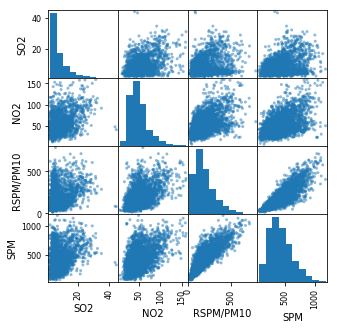

In [12]:
#Drawing the scatter plot of attributes to observe relation between attributes.
pd.plotting.scatter_matrix(dataset, figsize=(5, 5))
plt.show()

Ashok Vihar


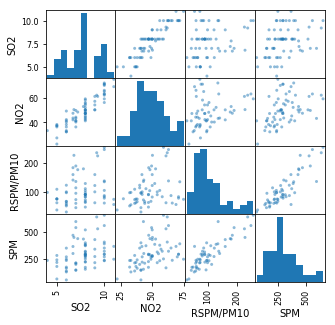

BSZ Marg


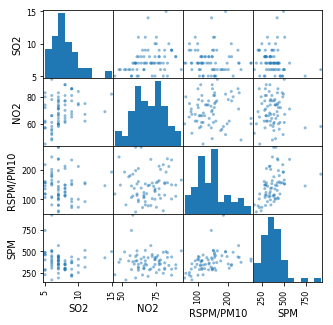

DCE
Janakpuri


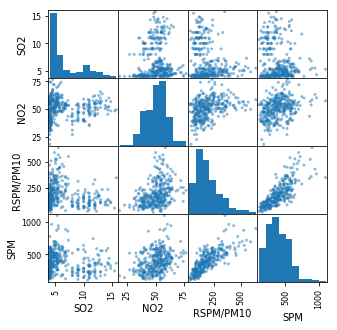

Mayapuri Industrial Area


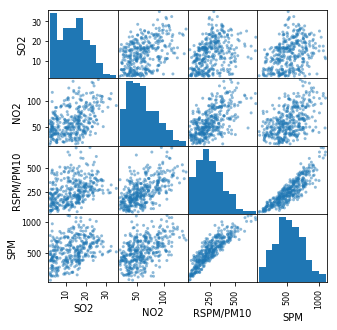

N.Y. SCHOOL


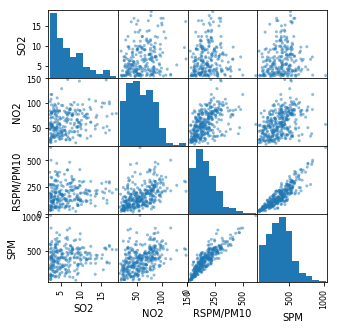

Nizamuddin


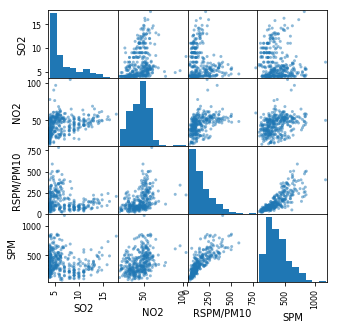

Pritampura


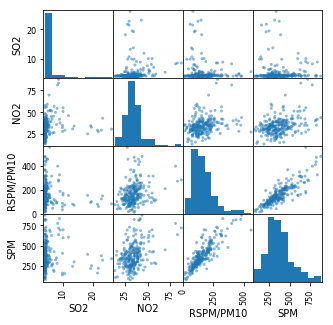

Shahdara


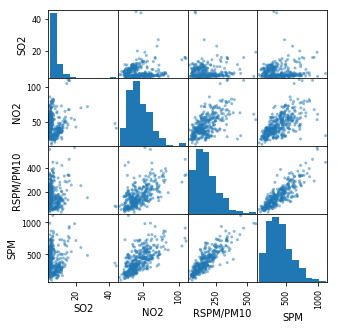

Shahzada Bagh


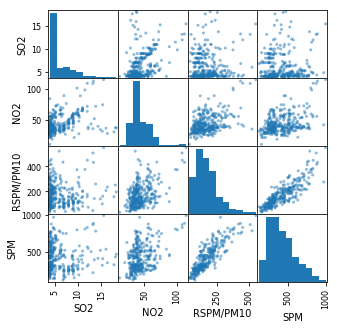

Siri Fort


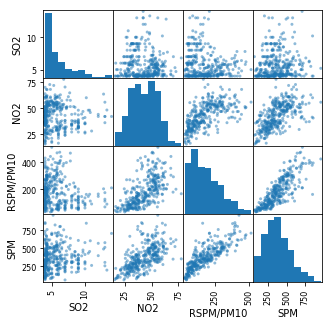

Town Hall


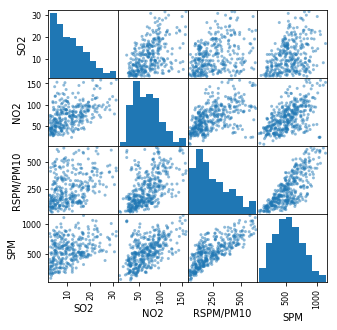

In [13]:
for name,group in grouped:
    print(name)
    if(name != 'DCE'):
        pd.plotting.scatter_matrix(group,figsize=(5,5))
        plt.show()

In [14]:
for name,group in grouped:
    print(name)
    print('Count = ',group.shape)
    print(group.isnull().sum())
    print('\n')

Ashok Vihar
Count =  (69, 6)
Sampling Date                     0
Location of Monitoring Station    0
SO2                               0
NO2                               0
RSPM/PM10                         9
SPM                               2
dtype: int64


BSZ Marg
Count =  (69, 6)
Sampling Date                     0
Location of Monitoring Station    0
SO2                               0
NO2                               0
RSPM/PM10                         0
SPM                               0
dtype: int64


DCE
Count =  (26, 6)
Sampling Date                      0
Location of Monitoring Station     0
SO2                               13
NO2                                1
RSPM/PM10                         26
SPM                               26
dtype: int64


Janakpuri
Count =  (360, 6)
Sampling Date                      0
Location of Monitoring Station     0
SO2                                2
NO2                                2
RSPM/PM10                         23
SPM         

Ashok Vihar


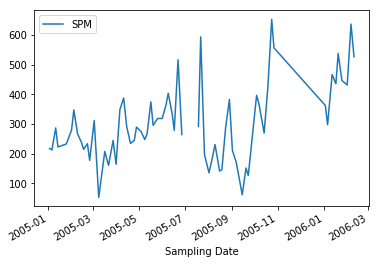

BSZ Marg


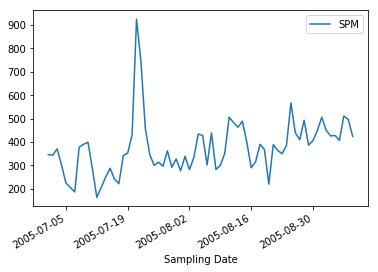

Janakpuri


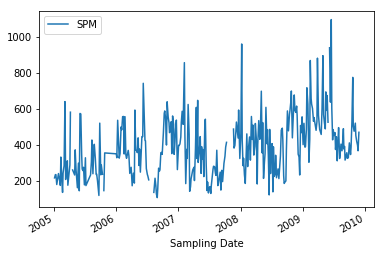

Mayapuri Industrial Area


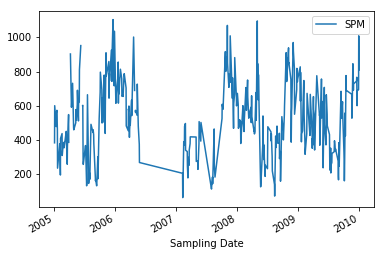

N.Y. SCHOOL


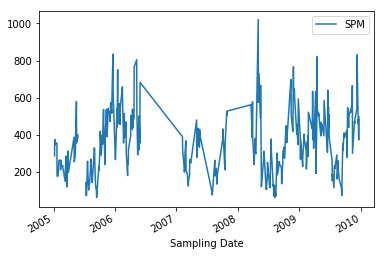

Nizamuddin


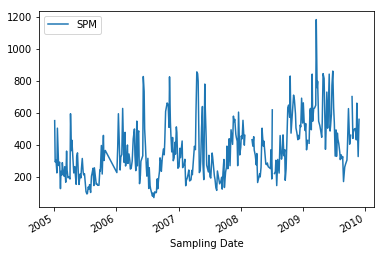

Pritampura


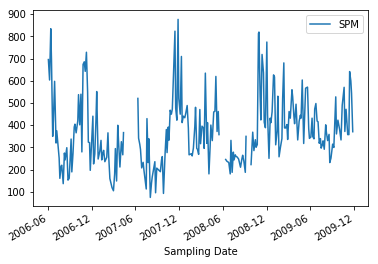

Shahdara


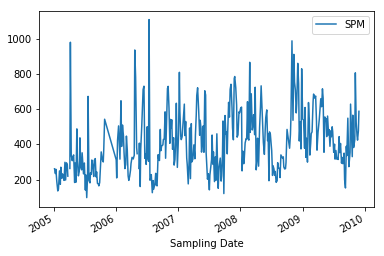

Shahzada Bagh


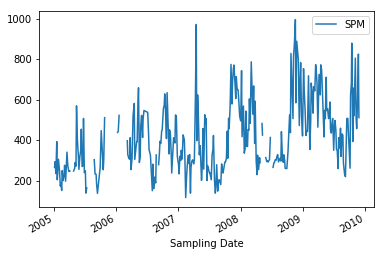

Siri Fort


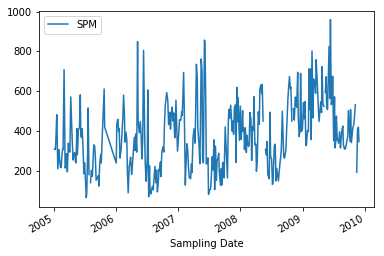

Town Hall


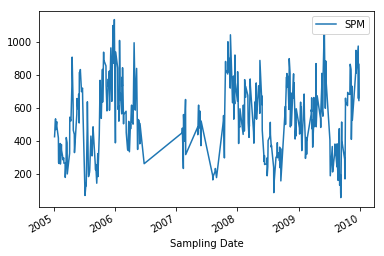

In [15]:
for name,group in grouped:
    if name != 'DCE':
        print(name)
        group.plot('Sampling Date' , 'SPM')
        plt.show()

Ashok Vihar


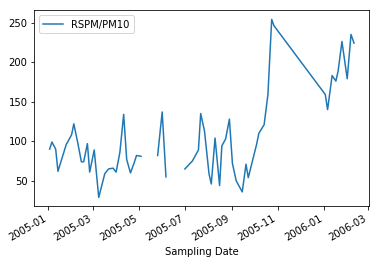

BSZ Marg


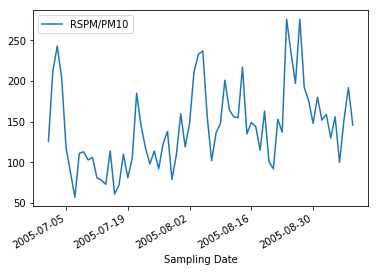

Janakpuri


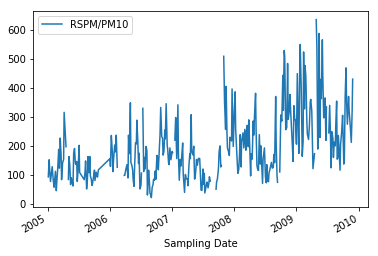

Mayapuri Industrial Area


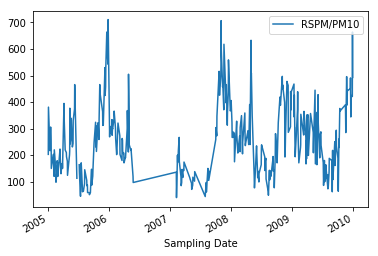

N.Y. SCHOOL


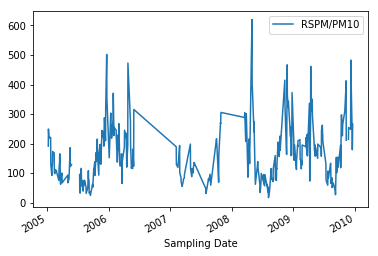

Nizamuddin


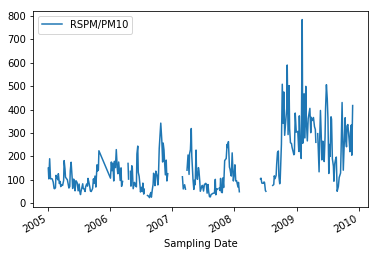

Pritampura


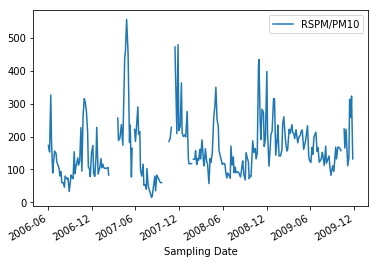

Shahdara


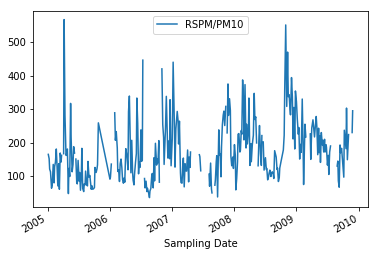

Shahzada Bagh


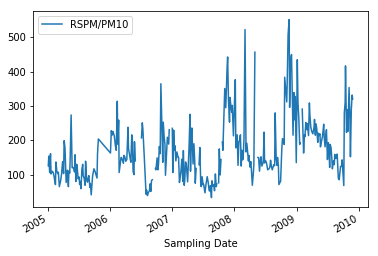

Siri Fort


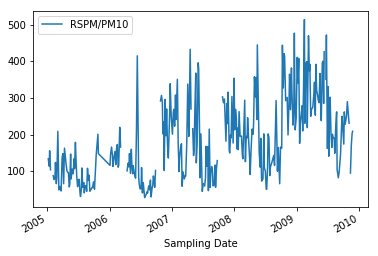

Town Hall


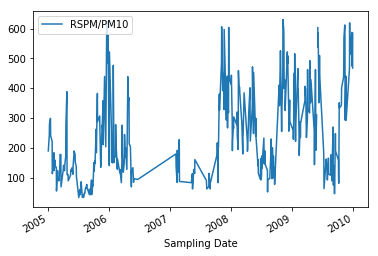

In [16]:
for name,group in grouped:
    if name != 'DCE':
        print(name)
        group.plot('Sampling Date' , 'RSPM/PM10')
        plt.show()

Ashok Vihar


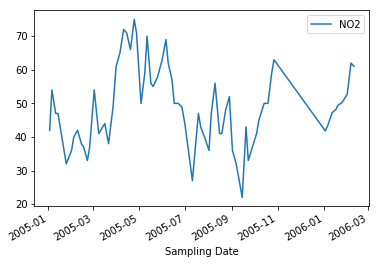

BSZ Marg


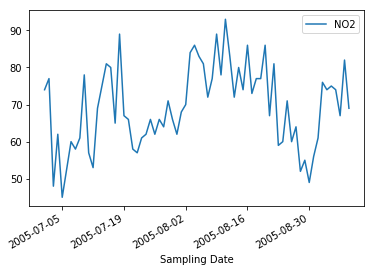

Janakpuri


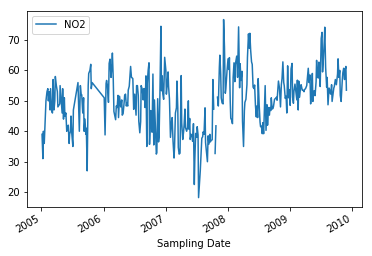

Mayapuri Industrial Area


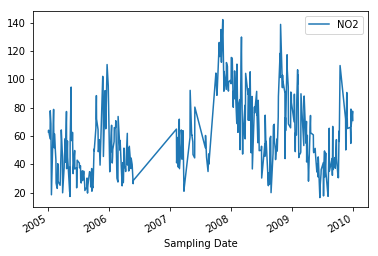

N.Y. SCHOOL


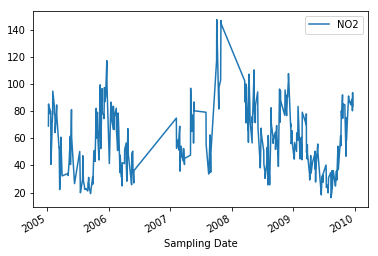

Nizamuddin


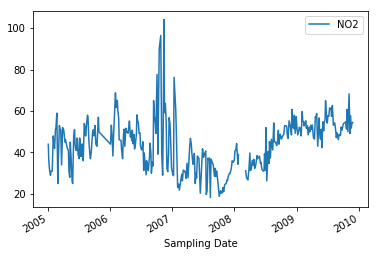

Pritampura


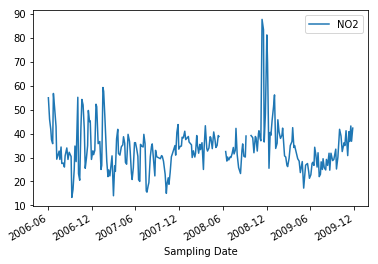

Shahdara


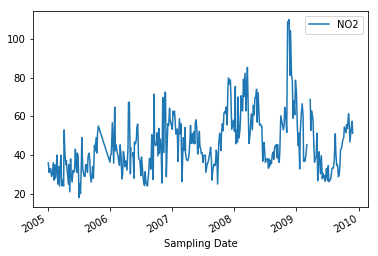

Shahzada Bagh


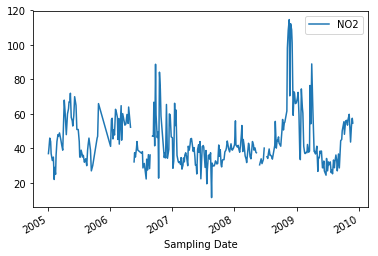

Siri Fort


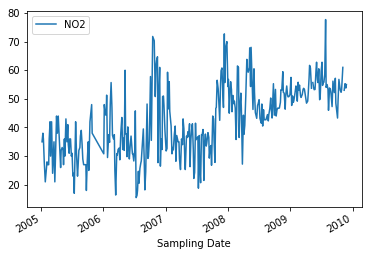

Town Hall


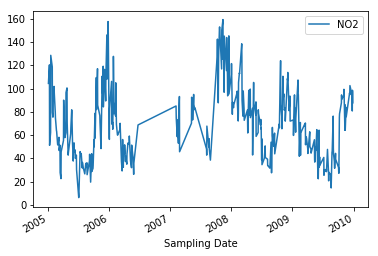

In [17]:
for name,group in grouped:
    if name != 'DCE':
        print(name)
        group.plot('Sampling Date' , 'NO2')
        plt.show()

Ashok Vihar


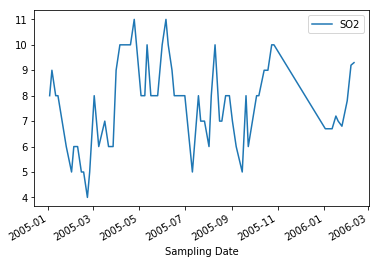

BSZ Marg


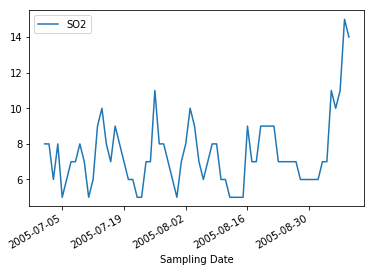

Janakpuri


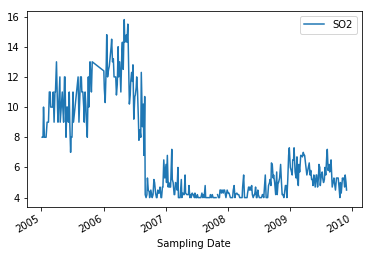

Mayapuri Industrial Area


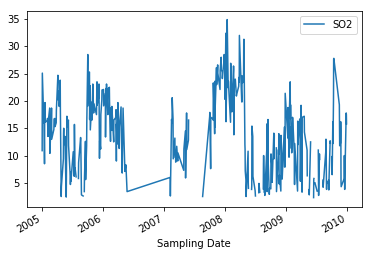

N.Y. SCHOOL


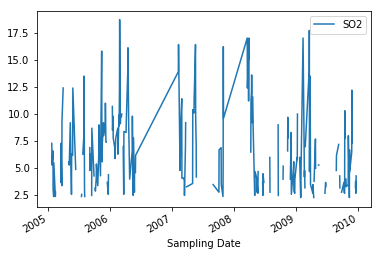

Nizamuddin


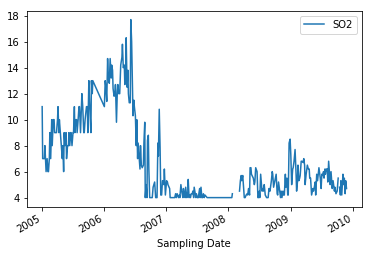

Pritampura


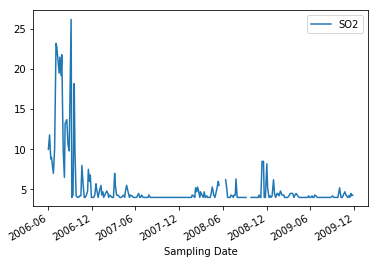

Shahdara


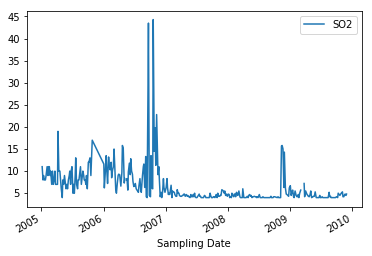

Shahzada Bagh


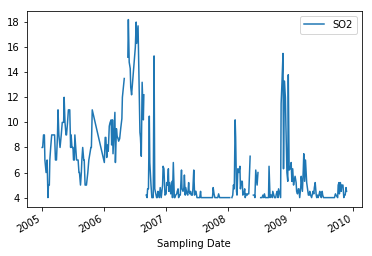

Siri Fort


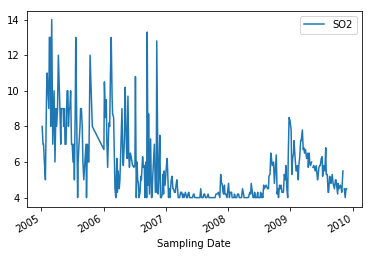

Town Hall


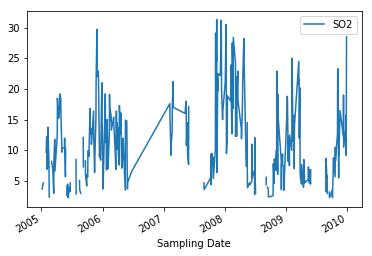

In [18]:
for name,group in grouped:
    if name != 'DCE':
        print(name)
        group.plot('Sampling Date' , 'SO2')
        plt.show()

In [37]:
import plotly as py
import plotly.graph_objs as go
import pandas as pd
from datetime import datetime
py.offline.init_notebook_mode(connected = True)
dataMaya = grouped.get_group('Siri Fort')
#layout = go.layout(
    #title = 'TIME SERIES GRAPH',
    #yaxis = dict(
    #   title = 'SPM'
    #),
    #xaxis = dict(
    #    title='TIME'
    #)
#)

trace = go.Scatter(
    y = dataMaya.SPM,
    x = dataMaya['Sampling Date'],
    mode = 'lines',
    name = 'Dataset',
    line = dict(
        shape = 'spline'
    )
)

data = go.Figure(data = [trace])

py.offline.iplot(data)


In [20]:
dataMaya = dataMaya.set_index('Sampling Date',drop = True)

In [36]:
d1 = dataMaya.ffill()
d1.isnull().sum()

NO2          0
RSPM/PM10    0
SO2          0
SPM          0
dtype: int64

In [32]:
import plotly as py
import plotly.graph_objs as go
import pandas as pd
from datetime import datetime
py.offline.init_notebook_mode(connected = True)
#d = dataMaya.interpolate()
#layout = go.layout(
    #title = 'TIME SERIES GRAPH',
    #yaxis = dict(
    #   title = 'SPM'
    #),
    #xaxis = dict(
    #    title='TIME'
    #)
#)

trace = go.Scatter(
    y = d1.SPM,
    x = d1.index,
    mode = 'lines',
    name = 'Dataset',
    line = dict(
        shape = 'spline'
    )
)

data = go.Figure(data = [trace])

py.offline.iplot(data)

In [23]:
d1.isnull().sum()

NO2          0
RSPM/PM10    0
SO2          0
SPM          0
dtype: int64

In [28]:
d1 = d1.asfreq('W',method = 'ffill')

In [30]:
d1.isnull().sum()

NO2          0
RSPM/PM10    0
SO2          0
SPM          0
dtype: int64

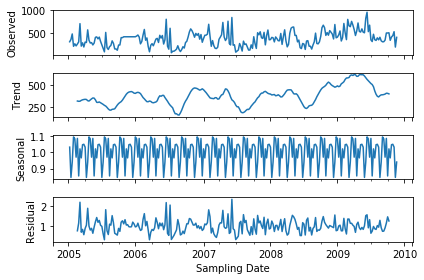

In [29]:
result = sm.tsa.seasonal_decompose(d1['SPM'], model='multiplicative',freq = 12)
result.plot()
plt.show()

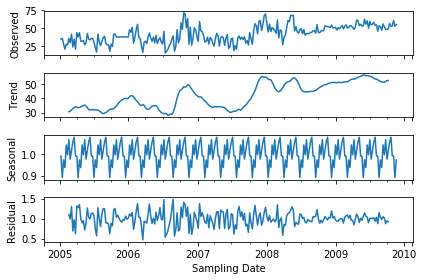

In [33]:
result = sm.tsa.seasonal_decompose(d1['NO2'], model='multiplicative',freq = 12)
result.plot()
plt.show()

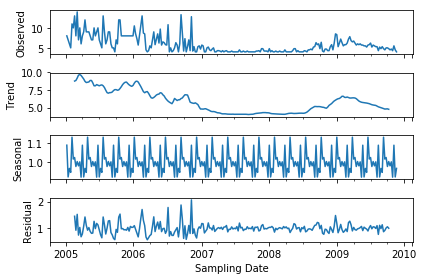

In [34]:
result = sm.tsa.seasonal_decompose(d1['SO2'], model='multiplicative',freq = 12)
result.plot()
plt.show()

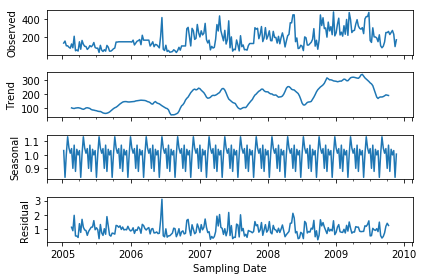

In [35]:
result = sm.tsa.seasonal_decompose(d1['RSPM/PM10'], model='multiplicative',freq = 12)
result.plot()
plt.show()